In [2]:
from neuron import h
from neuron.units import ms, mV
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'neuron.hoc38'

In [2]:
h.load_file('stdrun.hoc')

1.0

In [4]:
dend = h.Section(name='dend')

In [48]:
dend.L = 179.28  # um
dend.diam = 0.36  # um
dend.Ra = 70  # ohm * cm
dend.cm = 1  # uF/cm^2
dend.nseg = 101
dend.insert('pas')
for seg in dend:
    seg.pas.g = (1/2500)  # S/cm^2
    seg.pas.e = 0  # mV
h.define_shape()

1.0

In [42]:
stim = h.IClamp(dend(0))

In [49]:
stim.amp = 0.0286  # nA
stim.i = 0.0286
stim.delay = 0  # ms
stim.dur = 1e9  # ms

In [54]:
dend_v_0 = h.Vector().record(dend(0)._ref_v)
t_0 = h.Vector().record(h._ref_t)
h.finitialize(0 * mV)
h.continuerun(20 * ms)

0.0

In [55]:
dend_v_05 = h.Vector().record(dend(0.5)._ref_v)
t_05 = h.Vector().record(h._ref_t)
h.finitialize(0 * mV)
h.continuerun(20 * ms)

0.0

In [56]:
dend_v_1 = h.Vector().record(dend(1)._ref_v)
t_1 = h.Vector().record(h._ref_t)
h.finitialize(0 * mV)
h.continuerun(20 * ms)

0.0

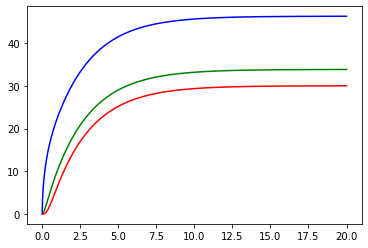

In [57]:
plt.plot(t_0, dend_v_0, color='blue')
plt.plot(t_05, dend_v_05, color='green')
plt.plot(t_1, dend_v_1, color='red')
plt.show()

In [61]:
from numpy import *

In [65]:
savetxt('neuron_data.dat', column_stack((t_0, dend_v_0, dend_v_05, dend_v_1)))